In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


data = pd.read_csv('ValoresAtipicosMx.csv', index_col="id")


freq_tbl(data)

  last_scraped  frequency  percentage  cumulative_perc
0   2024-09-25      15745    0.592318         0.592318
1   2024-09-26      10837    0.407682         1.000000

----------------------------------------------------------------

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                        Perfecto Loft en gran ubicación         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                                       Magenta by Kukun         21   
...                                                  ...        ...   
25165      Astonishing view@Condesa best nbh perfect apt          1   
25166  Private suite in Condesa Great internet & loca...          1   
25167          Artsy habitación frente al Parque México!          1   
25168  LOFT 14 (Parque Delta, Hosp. siglo XXI, Foro Sol)  

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 35797 to 1252229157495978163
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   host_id                                       26582 non-null  int64  
 3   host_name                                     26582 non-null  object 
 4   host_since                                    26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_is_superhost                             26582 non-null  object 
 7   host_identity_verified                        26582 non-null  object 
 8   neighbourhood                                 26582 non-null  object 
 9   neighbourhood_cleansed                        26

In [7]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1 = freq_tbl(data['neighbourhood_cleansed'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
Filtro_index = table2.set_index('neighbourhood_cleansed')
Filtro_index

,frequency
neighbourhood_cleansed,
Cuauhtémoc,12231
Miguel Hidalgo,4533
Benito Juárez,3152
Coyoacán,1719
Álvaro Obregón,1075
Tlalpan,812
Venustiano Carranza,734
Gustavo A. Madero,506
Cuajimalpa de Morelos,442


<Axes: ylabel='frequency'>

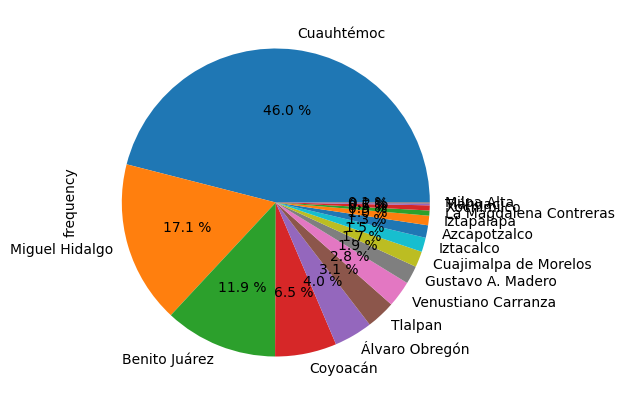

In [ ]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=False, autopct='%0.1f %%')

(array([0, 1]), [Text(0, 0, '2024-09-25'), Text(1, 0, '2024-09-26')])

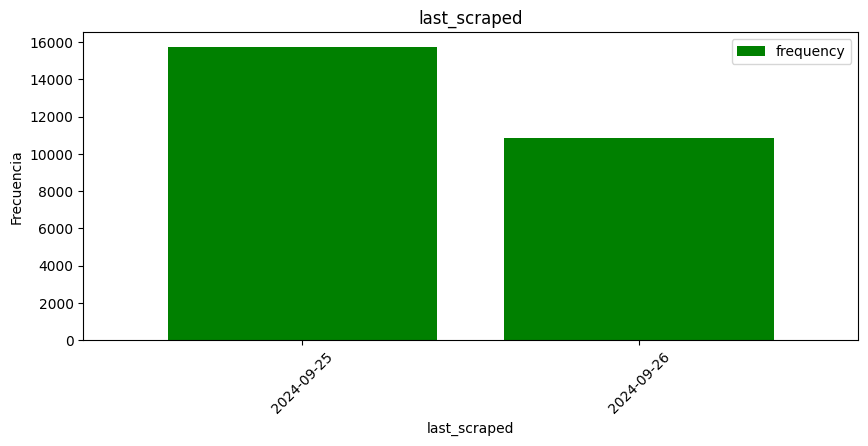

In [12]:
table1 = freq_tbl(data['last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

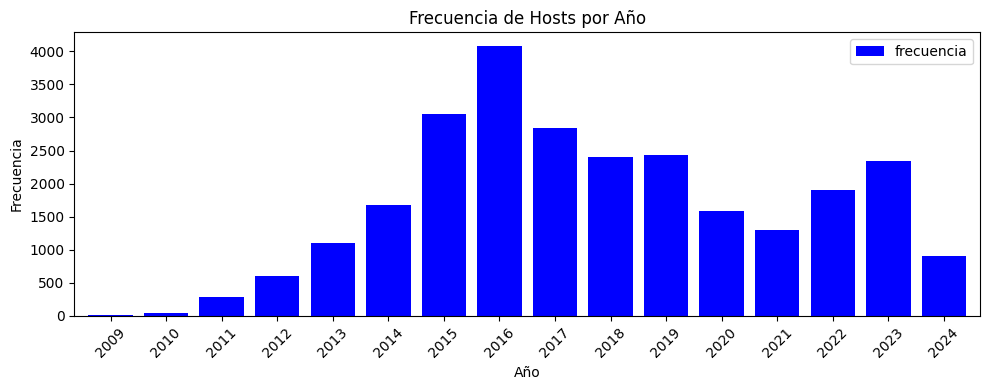

In [ ]:

data['host_since'] = pd.to_datetime(data['host_since'])  # Convertimos a datetime

# Agrupar por una unidad de tiempo (por ejemplo, mes o año)
# Agrupamos por año para obtener la frecuencia de hosts registrados por año
table1 = data['host_since'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['host_since', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('host_since')  # Ordenar cronológicamente

# Ajustar el índice al DataFrame
Filtro_index = table1.set_index('host_since')

# Gráfica de barras
Filtro_index.plot(kind='bar', width=0.8, figsize=(10, 4), color='blue')
plt.title('Frecuencia de Hosts por Año')
plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.xticks(rotation=45)  # Girar etiquetas para mejor lectura
plt.tight_layout()  # Ajustar diseño
plt.show()

In [ ]:
from collections import Counter
import ast

# Convertir cadenas de texto a listas reales (si están en formato string como JSON)
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Combinar todas las listas de amenities
all_amenities = sum(data['amenities'], [])

# Contar la frecuencia de cada amenidad
amenities_count = Counter(all_amenities)

# Convertir a DataFrame para análisis más cómodo
amenities_df = pd.DataFrame(amenities_count.items(), columns=['amenity', 'count']).sort_values(by='count', ascending=False)
print(amenities_df.head())

# Seleccionar las 10 amenidades más comunes
top_amenities = amenities_df.head(10)

# Graficar
top_amenities.plot(kind='bar', x='amenity', y='count', color='skyblue', figsize=(10, 5))
plt.title('Top 10 Amenidades Más Comunes')
plt.ylabel('Frecuencia')
plt.xlabel('Amenidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
table1 = freq_tbl(data['calendar_last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,calendar_last_scraped,frequency
0,2024-09-25,15757
1,2024-09-26,10825


(array([0, 1]), [Text(0, 0, '2024-09-25'), Text(1, 0, '2024-09-26')])

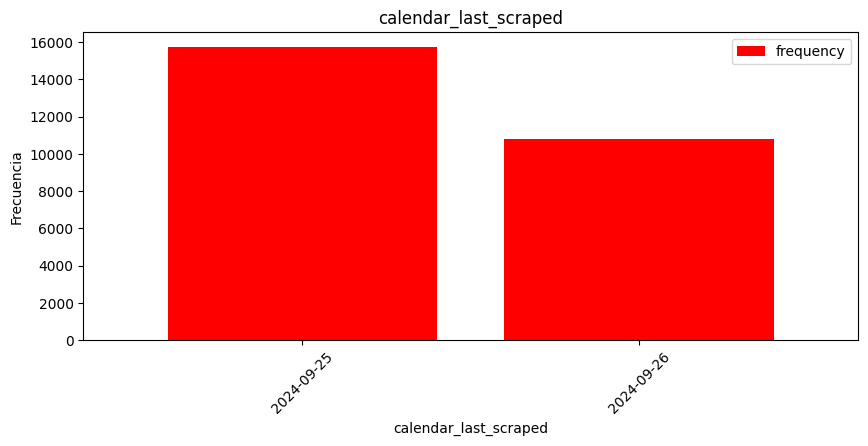

In [27]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('calendar_last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('calendar_last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

C:\Users\dylan\AppData\Local\Temp\ipykernel_17388\3752056554.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_review'] = pd.to_datetime(data['first_review'], errors='coerce')


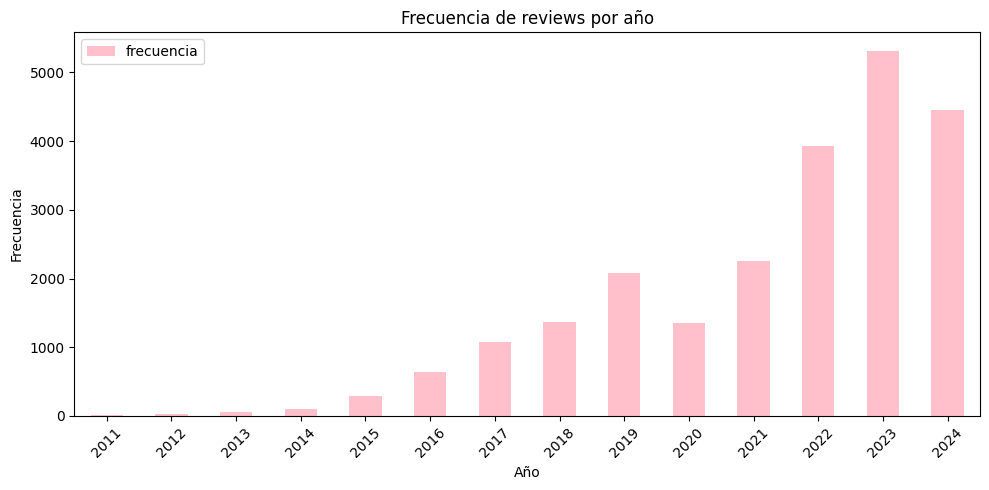

In [28]:
data['last_review'] = pd.to_datetime(data['first_review'], errors='coerce')

# Agrupar por año y contar las frecuencias
table1 = data['last_review'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['last_review', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('last_review')  # Ordenar cronológicamente

# Graficar los datos
table1.plot(x='last_review', y='frecuencia', kind='bar', figsize=(10, 5), color='pink')
plt.title('Frecuencia de reviews por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x1cc0974e360>,
 [Text(0, 0, 'Sí (t)'), Text(1, 0, 'No (f)')])

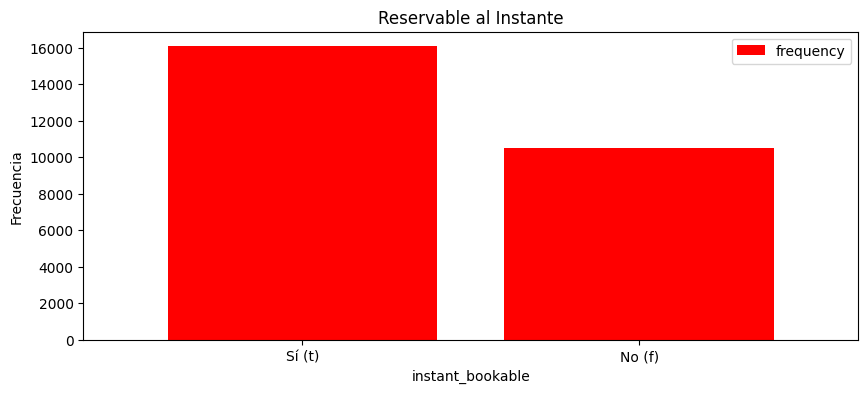

In [29]:
table1 = freq_tbl(data['instant_bookable'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('instant_bookable')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('Reservable al Instante')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Sí (t)', 'No (f)'], rotation=0)

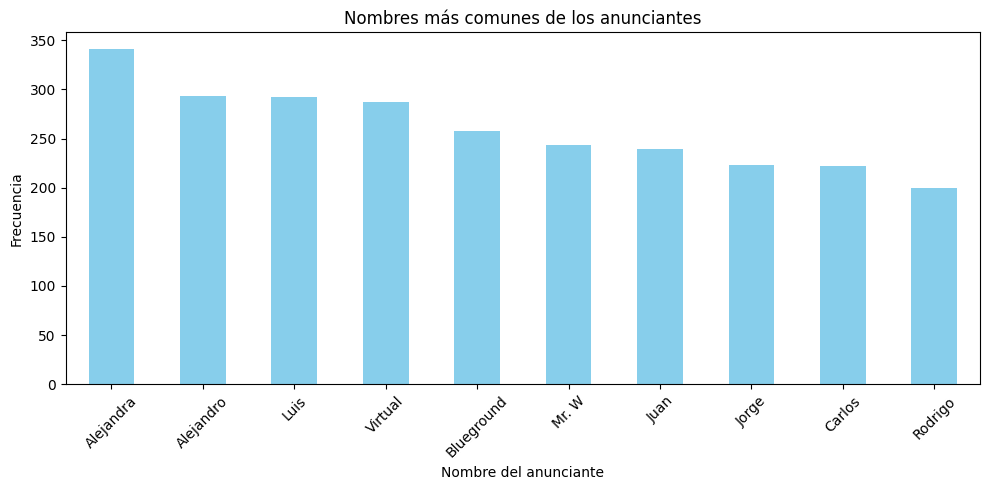

In [30]:
# Contar cuántos nombres únicos existen
unique_names = data['host_name'].nunique()
#print(f"\nNombres únicos: {unique_names}")

# Contar la frecuencia de cada nombre
name_counts = data['host_name'].value_counts()
#print("\nNombres más comunes y sus frecuencias:")
#print(name_counts.head(10))

# Graficar los 10 nombres más comunes
plt.figure(figsize=(10, 5))
name_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Nombres más comunes de los anunciantes')
plt.xlabel('Nombre del anunciante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()